In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
inputs = keras.Input(shape=(200,128))

In [ ]:
masking = keras.layers.Masking()

In [ ]:
x = masking(inputs)

In [ ]:
batch_norm1 = keras.layers.BatchNormalization(name = 'Encoder')(x)

In [ ]:
td_drop = keras.layers.TimeDistributed(keras.layers.Dropout(0.2))(batch_norm1)

In [ ]:
bd1_op , state_1 , state_2 , state_3 , state_4 = keras.layers.Bidirectional(keras.layers.LSTM(128 , return_state=True ,return_sequences=True))(td_drop)

In [ ]:
bd2_op , l21 , l22 , l23 , l24 = keras.layers.Bidirectional(keras.layers.LSTM(128 , return_state=True ,return_sequences=True))(bd1_op)



In [ ]:
bd3_op , l31 , l32 , l33 , l34 = keras.layers.Bidirectional(keras.layers.LSTM(128 , return_state=True ,return_sequences=True))(bd2_op)


In [ ]:
concat1 = keras.layers.concatenate([l31,l32])

In [ ]:
concat2 = keras.layers.concatenate([l33,l34])

In [ ]:
att = keras.layers.MultiHeadAttention(2,2)(bd3_op , bd3_op)

In [ ]:
batch_norm2 = keras.layers.BatchNormalization(name = 'Decoder')(att)

In [ ]:
td_drop2 = keras.layers.TimeDistributed(keras.layers.Dropout(0.2))(batch_norm2)

In [ ]:
all_state_h, state_h, state_c = keras.layers.LSTM(256 , return_sequences=True , return_state=True)([td_drop2 , concat1 , concat2])

In [ ]:
td_drop3 = keras.layers.TimeDistributed(keras.layers.Dropout(0.2))(all_state_h)

In [ ]:
all_state_h3, state_h3, state_c3 = keras.layers.LSTM(256 , return_sequences=True , return_state=True)([td_drop3 , state_h , state_c])

In [ ]:
op = keras.layers.TimeDistributed(keras.layers.Dense(128))(all_state_h3)

In [ ]:
model3 = keras.Model(inputs = inputs , outputs = op)

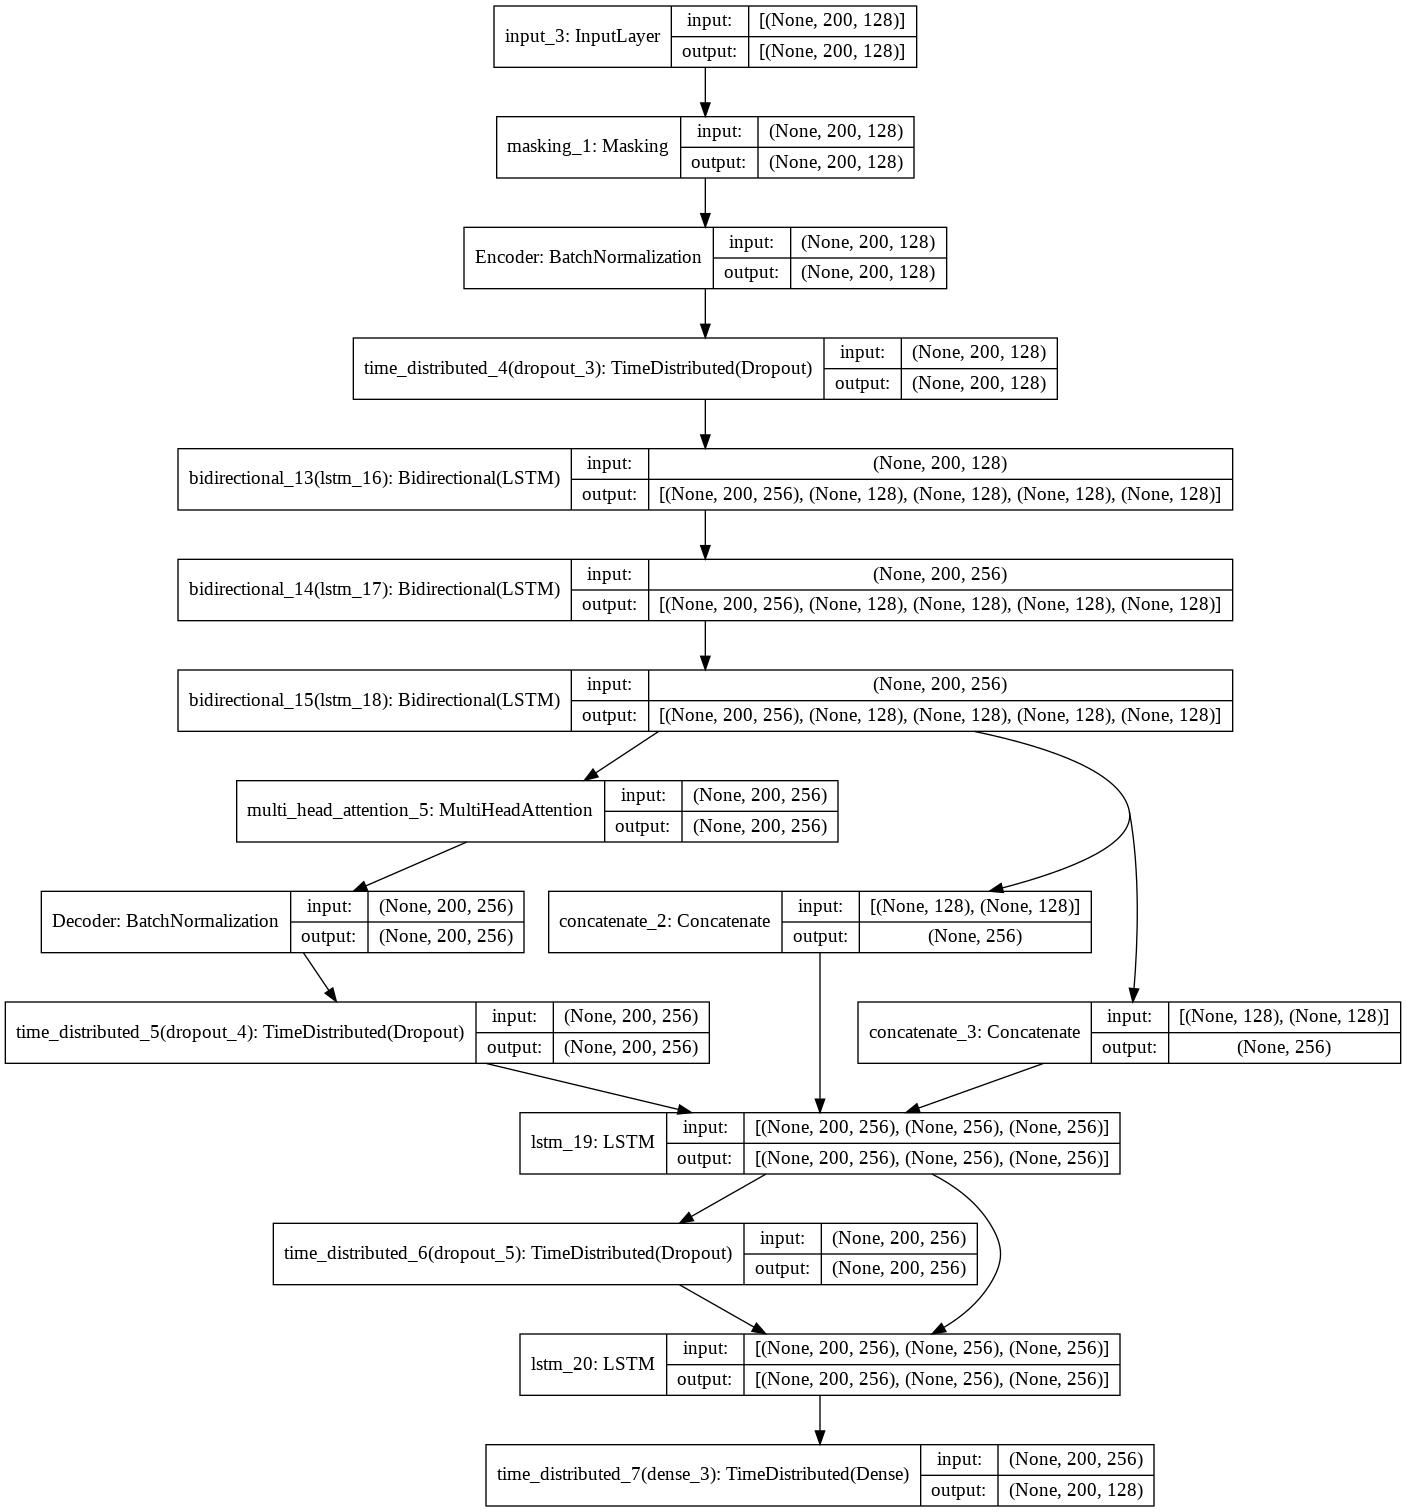

In [ ]:
keras.utils.plot_model(model3,show_shapes=True , to_file='Model3.jpg')

In [ ]:
model3

NameError: ignored